In [7]:
## Task 1 : Explaining the data
import pandas as pd
import matplotlib.pyplot as plt
from tableone import tableone 
import numpy as np
import os
import plotly.express as px
from lifelines import KaplanMeierFitter


# Importing database from client.
originaldb = pd.read_csv(os.path.join('..', 'data', 'dataset.csv'))

# Let's see first a quick glance of the structure
originaldb.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
# The size of your study (n) is 298. 
# As you can see, all variables have been equally filled out for each one of the 298 variables.
originaldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       298 non-null    float64
 1   anaemia                   298 non-null    int64  
 2   creatinine_phosphokinase  298 non-null    int64  
 3   diabetes                  298 non-null    int64  
 4   ejection_fraction         298 non-null    int64  
 5   high_blood_pressure       298 non-null    int64  
 6   platelets                 298 non-null    float64
 7   serum_creatinine          298 non-null    float64
 8   serum_sodium              298 non-null    int64  
 9   sex                       298 non-null    int64  
 10  smoking                   298 non-null    int64  
 11  time                      298 non-null    int64  
 12  DEATH_EVENT               298 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [9]:
# In this table of baseline characteristics, you can find the basic distribution of the variables.
# Among other relevant aspects, you can see that the median age is 60.83 years old (IQR 51-70), and that 32.2% of the patients died.
# As a median, each patient was followed up for 115 days (IQR 73.2-204.0).
tableone(originaldb, categorical=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'], nonnormal=['age', 'time'])    

Missing             Overall
n                                                             298
age, median [Q1,Q3]                         0    60.0 [51.0,70.0]
anaemia, n (%)                      0       0          170 (57.0)
                                    1                  128 (43.0)
creatinine_phosphokinase, mean (SD)         0       583.0 (971.7)
diabetes, n (%)                     0       0          173 (58.1)
                                    1                  125 (41.9)
ejection_fraction, mean (SD)                0         38.2 (11.8)
high_blood_pressure, n (%)          0       0          193 (64.8)
                                    1                  105 (35.2)
platelets, mean (SD)                        0  263815.6 (97647.6)
serum_creatinine, mean (SD)                 0           1.4 (1.0)
serum_sodium, mean (SD)                     0         136.6 (4.4)
sex, n (%)                          0       0          105 (35.2)
                                    1                  193 (64.8)
smoking, n (%)                      0       0          202 (67.8)
                                    1                   96 (32.2)
time, median [Q1,Q3]                        0  115.0 [73.2,204.0]
DEATH_EVENT, n (%)                  0       0          203 (68.1)
                                    1                   95 (31.9)

In [10]:
# After a exploratory analysis, you can see some interesting (and natural) findings:
# For example, the shorter follow-up time in the diabetes population that could be attributed to a higher mortality in that group.
df = px.data.tips()
fig = px.box(originaldb, x="DEATH_EVENT", y="time", points="all", color="diabetes")
fig.show()

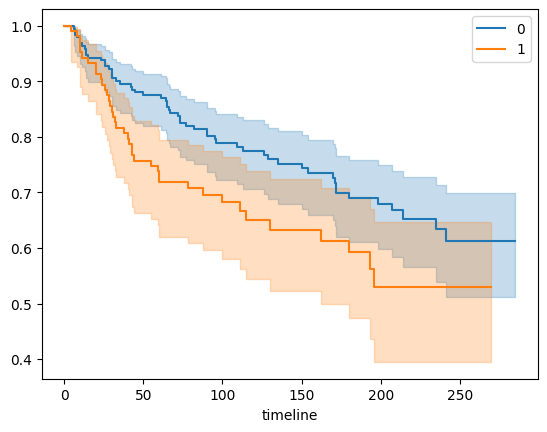

In [13]:
# Before running any model, we can see there are variables that can partially explain the mortality among our population.
# High blood pressure seems to be one of them, but we will explore it further in the following steps. 
ax = plt.subplot(111)
kmf = KaplanMeierFitter()

for name, grouped_df in originaldb.groupby('high_blood_pressure'):
    kmf.fit(grouped_df["time"], grouped_df["DEATH_EVENT"], label=name)
    kmf.plot_survival_function(ax=ax)